# BasicTauHybridSolver

### Imports

In [101]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_tau_hybrid_solver import BasicTauHybridSolver

### Model Instantiation

Model must include rates, species, and reactions

In [103]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='Substrate', initial_value=301)
            B = gillespy2.Species(name='Enzyme', initial_value=120)
            C = gillespy2.Species(name='Enzyme_Substrate_Complex', initial_value=0)
            D = gillespy2.Species(name='Product', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [104]:
model = MichaelisMenten()


### Run Model and plot

In [105]:
%time results = model.run(solver=BasicTauHybridSolver())

CPU times: user 575 ms, sys: 12.8 ms, total: 588 ms
Wall time: 687 ms


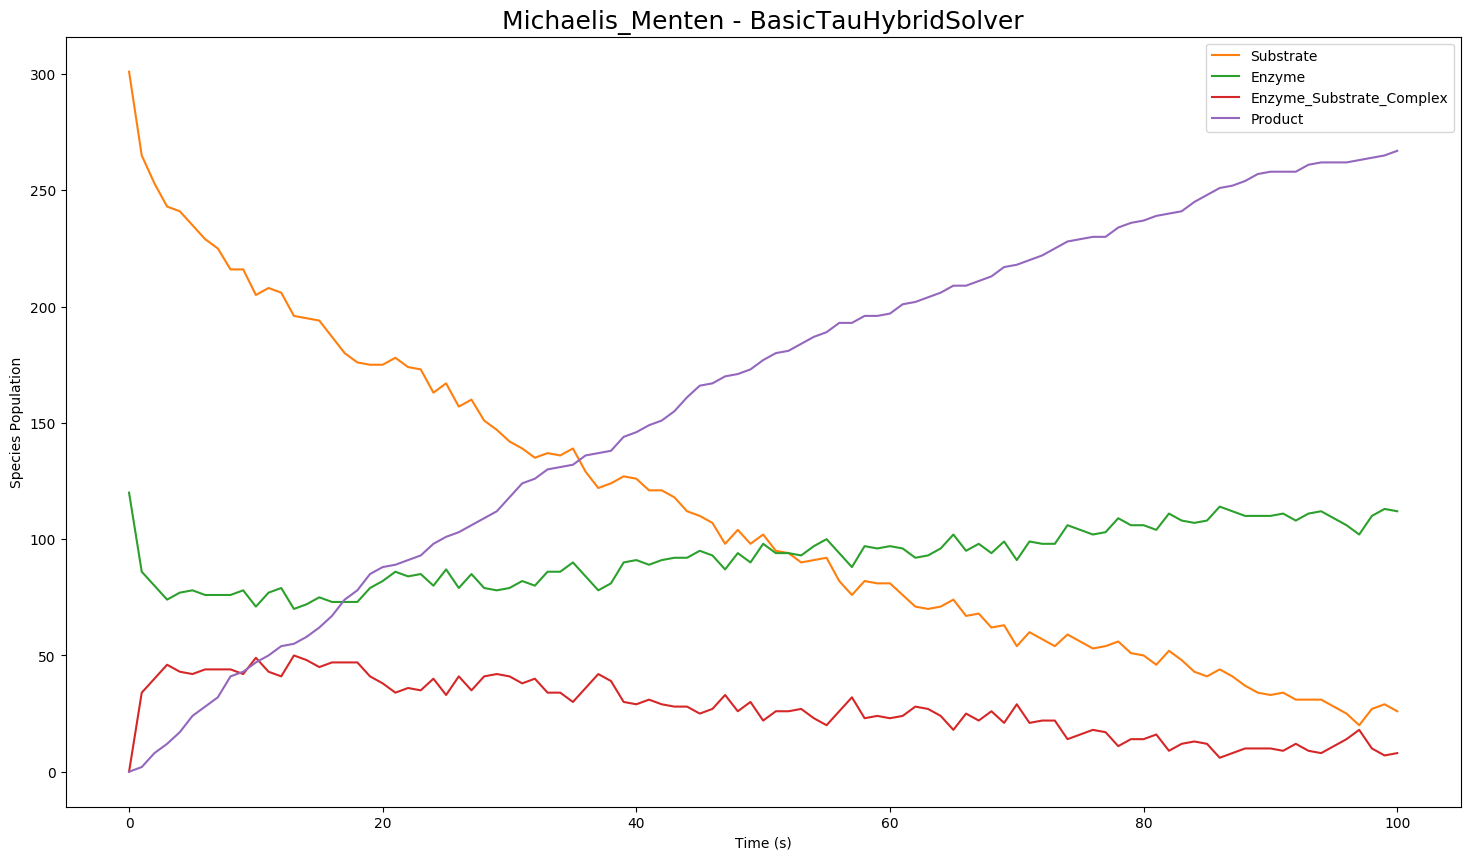

In [106]:
results.plot()

The number_of_trajectories specifies how many times you would like to run the solver.

In [107]:
%time results_many_trajectories = model.run(solver=BasicTauHybridSolver(),number_of_trajectories=5)

CPU times: user 2.51 s, sys: 45.9 ms, total: 2.56 s
Wall time: 3.08 s


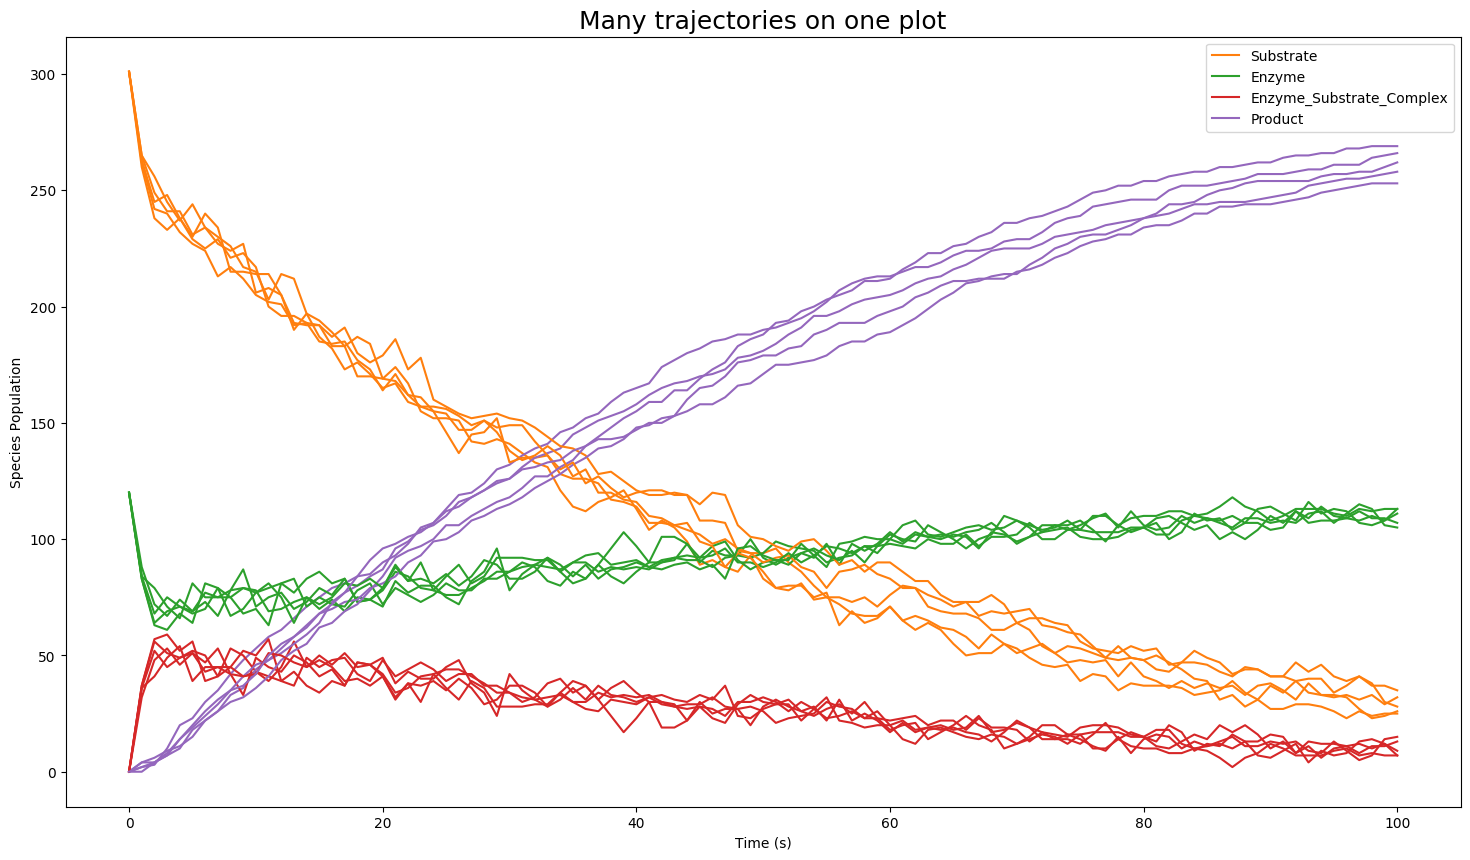

In [108]:
results_many_trajectories.plot(title="Many trajectories on one plot")

In [109]:
results_many_trajectories.plotplotly(title="Many trajectories on one plot")

<script type="text/javascript">
        window.PlotlyConfig = {MathJaxConfig: 'local'};
        if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}
        if (typeof require !== 'undefined') {
        require.undef("plotly");
        requirejs.config({
            paths: {
                'plotly': ['https://cdn.plot.ly/plotly-latest.min']
            }
        });
        require(['plotly'], function(Plotly) {
            window._Plotly = Plotly;
        });
        }
        </script>

<div>
        
        
            <div id="1e806540-36b7-4098-8466-ee7a25425134" class="plotly-graph-div" style="height:525px; width:100%;"></div>
            <script type="text/javascript">
                require(["plotly"], function(Plotly) {
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    window.PLOTLYENV.BASE_URL='https://plot.ly';
                    
                if (document.getElementById("1e806540-36b7-4098-8466-ee7a25425134")) {
                    Plotly.newPlot(
                        '1e806540-36b7-4098-8466-ee7a25425134',
                        [{"line": {"color": "#1f77b4"}, "mode": "lines", "name": "Substrate", "type": "scatter", "uid": "043540ed-f225-487c-a7e6-63d21fdebec2", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0], "y": [301.0, 262.0, 242.0, 240.0, 232.0, 227.0, 224.0, 213.0, 217.0, 212.0, 205.0, 202.0, 201.0, 192.0, 193.0, 192.0, 183.0, 183.0, 170.0, 170.0, 169.0, 174.0, 167.0, 155.0, 152.0, 152.0, 151.0, 142.0, 141.0, 143.0, 141.0, 137.0, 133.0, 131.0, 121.0, 114.0, 112.0, 116.0, 118.0, 121.0, 113.0, 104.0, 108.0, 105.0, 99.0, 89.0, 91.0, 88.0, 86.0, 93.0, 83.0, 79.0, 80.0, 80.0, 75.0, 77.0, 63.0, 69.0, 64.0, 66.0, 71.0, 65.0, 67.0, 65.0, 62.0, 61.0, 58.0, 53.0, 59.0, 55.0, 51.0, 53.0, 55.0, 51.0, 47.0, 48.0, 47.0, 48.0, 41.0, 47.0, 41.0, 39.0, 36.0, 39.0, 36.0, 38.0, 36.0, 37.0, 33.0, 37.0, 38.0, 35.0, 31.0, 38.0, 33.0, 33.0, 32.0, 27.0, 23.0, 24.0, 26.0]}, {"line": {"color": "#ff7f0e"}, "mode": "lines", "name": "Enzyme", "type": "scatter", "uid": "2c18a71c-564c-4871-8e38-bc3029f03091", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0], "y": [120.0, 83.0, 64.0, 69.0, 71.0, 69.0, 73.0, 67.0, 78.0, 79.0, 77.0, 79.0, 81.0, 77.0, 83.0, 86.0, 81.0, 83.0, 73.0, 74.0, 78.0, 86.0, 84.0, 79.0, 78.0, 84.0, 89.0, 81.0, 84.0, 92.0, 92.0, 92.0, 91.0, 91.0, 86.0, 81.0, 83.0, 89.0, 96.0, 103.0, 97.0, 90.0, 101.0, 101.0, 98.0, 90.0, 95.0, 93.0, 93.0, 100.0, 92.0, 89.0, 92.0, 94.0, 92.0, 98.0, 89.0, 98.0, 95.0, 98.0, 103.0, 99.0, 103.0, 101.0, 100.0, 102.0, 101.0, 96.0, 103.0, 102.0, 99.0, 101.0, 106.0, 106.0, 104.0, 106.0, 109.0, 111.0, 105.0, 112.0, 106.0, 104.0, 105.0, 110.0, 107.0, 109.0, 108.0, 110.0, 107.0, 113.0, 114.0, 111.0, 108.0, 116.0, 111.0, 113.0, 112.0, 107.0, 106.0, 108.0, 111.0]}, {"line": {"color": "#2ca02c"}, "mode": "lines", "name": "Enzyme_Substrate_Complex", "type": "scatter", "uid": "bc76a786-e8ac-49fa-9175-6df16df6364d", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 7

The EnsembleResults List created by multiple trajectories can use the average_ensemble function to create a single average of all the trajectories.

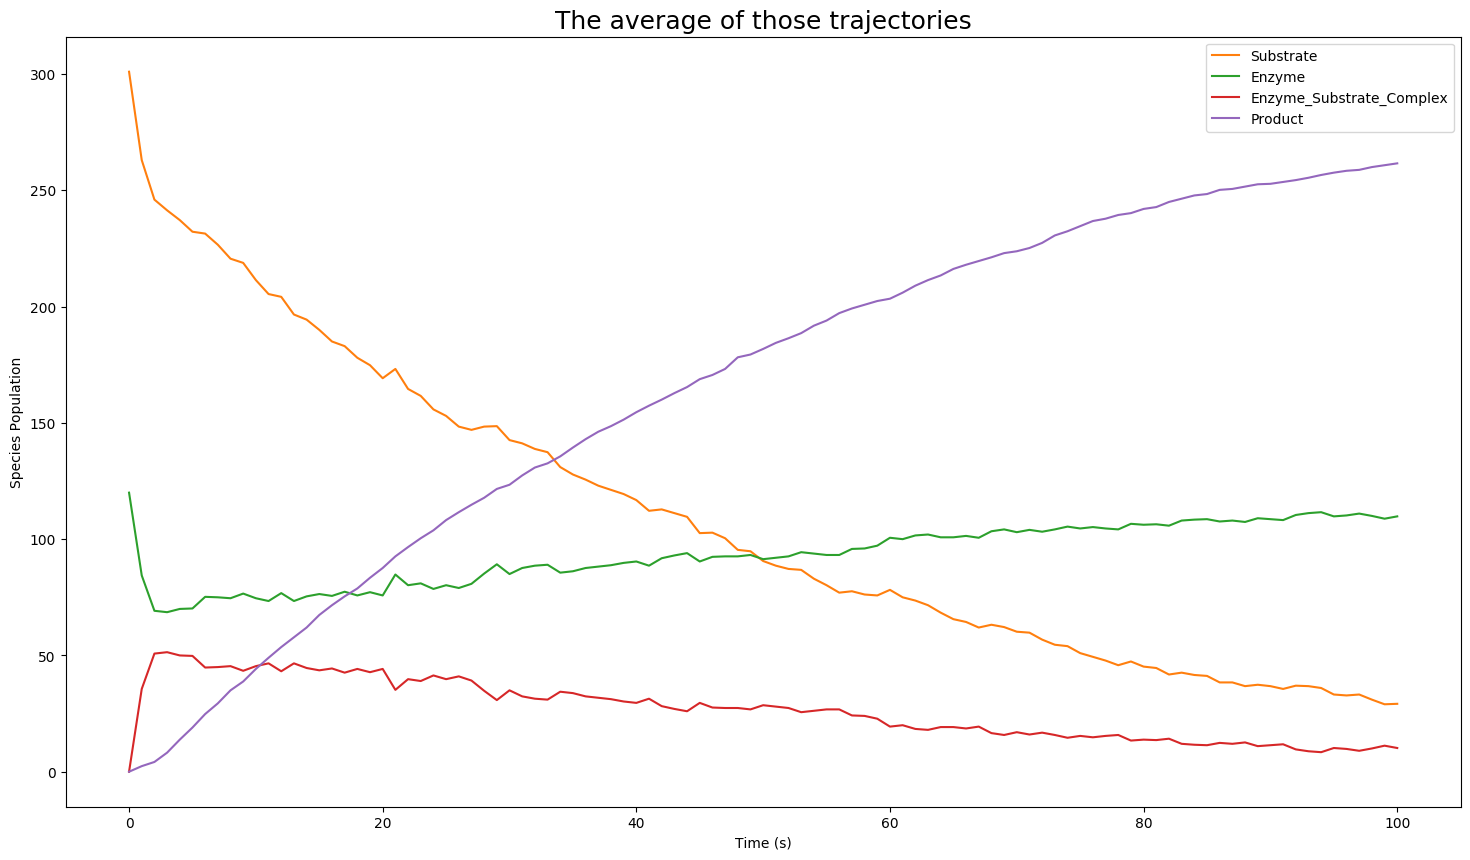

In [110]:
average_results = results_many_trajectories.average_ensemble()
average_results.plot(title="The average of those trajectories")

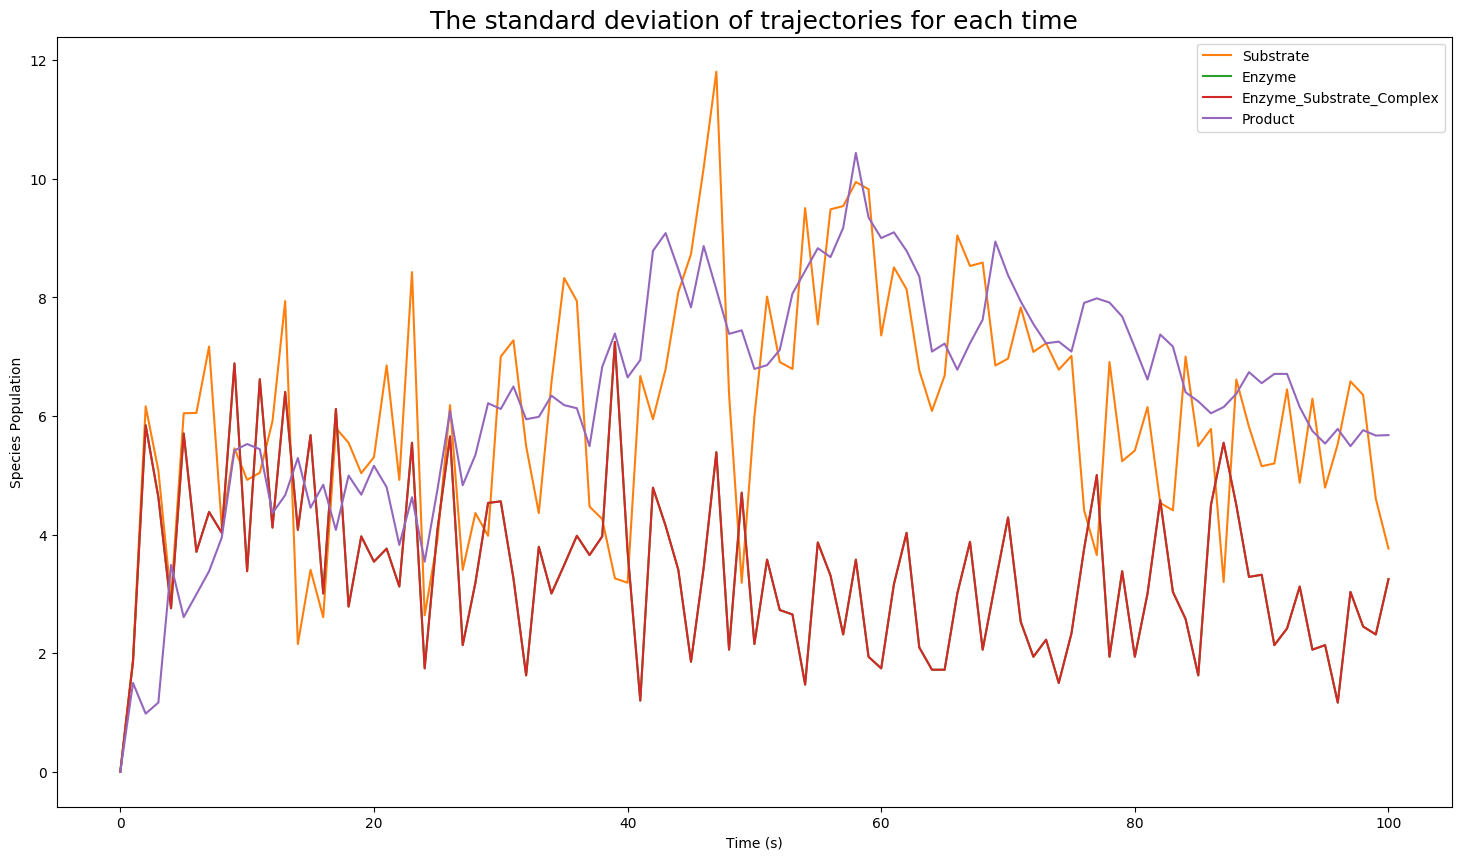

In [111]:
stddev_results = results_many_trajectories.stddev_ensemble()
stddev_results.plot(title="The standard deviation of trajectories for each time")

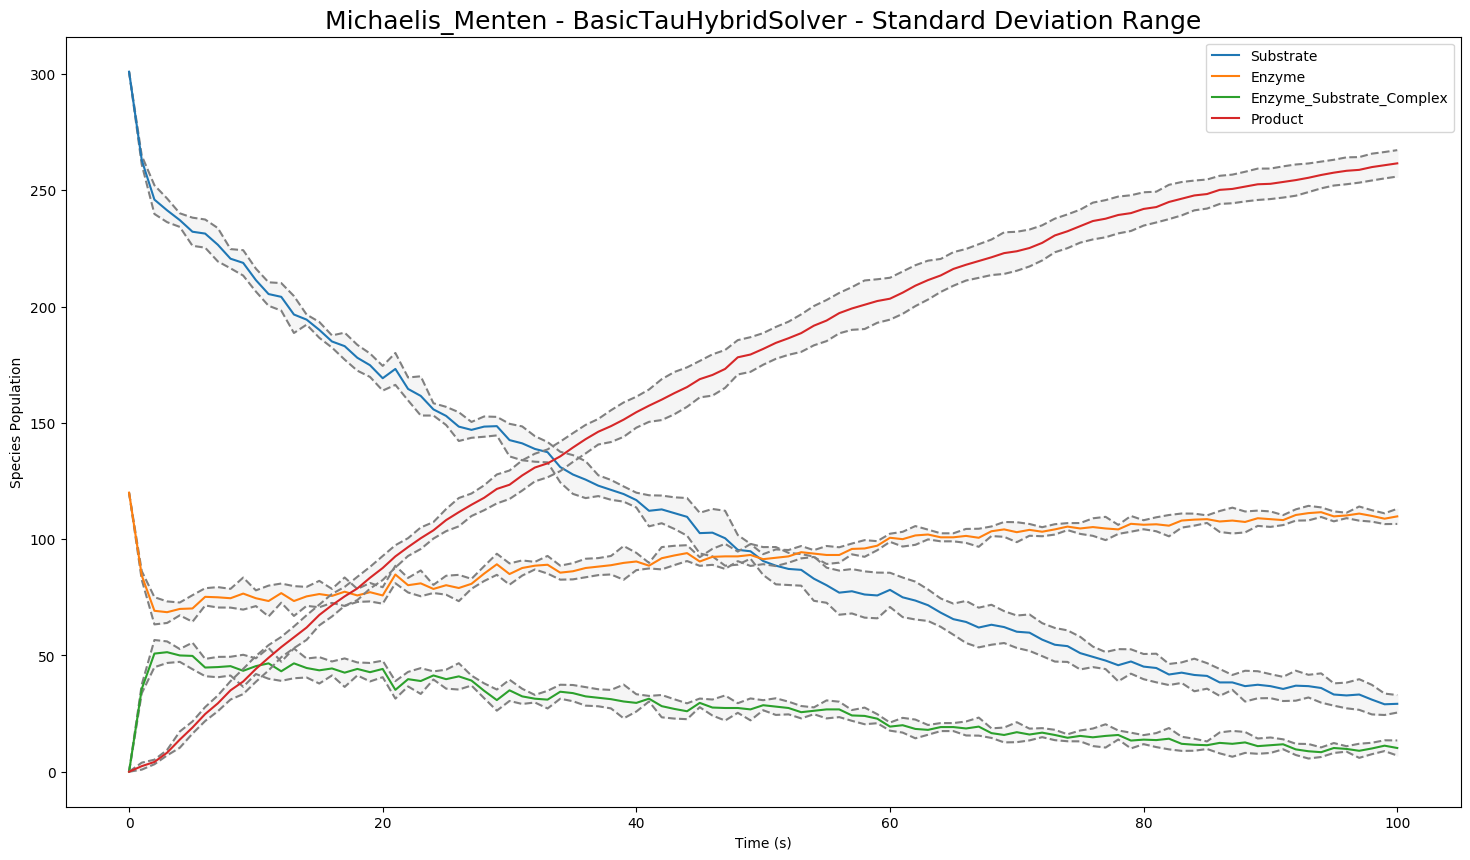

In [112]:
results_many_trajectories.plot_std_dev_range()

In [113]:
results_many_trajectories.plotplotly_std_dev_range()

<script type="text/javascript">
        window.PlotlyConfig = {MathJaxConfig: 'local'};
        if (window.MathJax) {MathJax.Hub.Config({SVG: {font: "STIX-Web"}});}
        if (typeof require !== 'undefined') {
        require.undef("plotly");
        requirejs.config({
            paths: {
                'plotly': ['https://cdn.plot.ly/plotly-latest.min']
            }
        });
        require(['plotly'], function(Plotly) {
            window._Plotly = Plotly;
        });
        }
        </script>

<div>
        
        
            <div id="087ad1ab-e3f5-417b-9dd5-59ecb49cb947" class="plotly-graph-div" style="height:525px; width:100%;"></div>
            <script type="text/javascript">
                require(["plotly"], function(Plotly) {
                    window.PLOTLYENV=window.PLOTLYENV || {};
                    window.PLOTLYENV.BASE_URL='https://plot.ly';
                    
                if (document.getElementById("087ad1ab-e3f5-417b-9dd5-59ecb49cb947")) {
                    Plotly.newPlot(
                        '087ad1ab-e3f5-417b-9dd5-59ecb49cb947',
                        [{"legendgroup": "Standard Deviation", "line": {"dash": "dot", "width": 1}, "marker": {"color": "#444"}, "mode": "lines", "name": "Substrate Upper Bound", "showlegend": false, "type": "scatter", "uid": "9e9cdcd6-d55b-4f36-9f3f-535cab605f89", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0], "y": [301.0, 264.89736659610105, 252.16441400296898, 246.48330601085553, 240.12574776766556, 238.24648658313237, 237.45309838016863, 233.77216843081644, 224.72795348811005, 224.25527267879434, 216.32341345003647, 210.4438080851674, 210.11269819963778, 204.53977329651167, 196.5540659228538, 193.40587727318527, 187.60768096208105, 188.79655069847578, 183.54977477020464, 179.83587132480568, 174.50659966456863, 180.05273667960472, 169.52341345003646, 170.02852300228218, 158.4381811916546, 156.8987177379236, 154.58384993349614, 150.40587727318527, 152.7634848458543, 152.5799497484265, 149.60285656000462, 148.4773621594641, 144.2918120870984, 141.7634848458543, 137.57267069006198, 136.1282651254628, 133.53977329651167, 127.47213595499957, 125.4614551505325, 122.66190128606003, 119.98747549010184, 118.87532770731146, 118.7464274989274, 117.99411510058522, 117.68949936646267, 111.33155198117723, 112.98626526259747, 112.20847153530042, 101.7749509802037, 97.98747549010184, 96.5866518188383, 96.61498596380554, 94.1108610172684, 93.59411510058521, 92.50789145920378, 87.74718490564528, 86.48683298050514, 87.14148835350125, 86.14786409235671, 85.62649479723059, 85.55934779718964, 83.50881895447306, 81.73879597975032, 78.3705243519243, 74.48604962188118, 72.28131723539602, 73.44654630231892, 70.53229160308062, 71.78836422143355, 69.05273667960473, 67.16850055607374, 67.63326241102645, 63.882372483850304, 61.82772439983706, 60.782329983125265, 58.01427116670007, 53.80908153700972, 51.45513337649941, 52.7108610172684, 52.638320341483514, 50.61848687365763, 50.75142259969188, 46.33431361950185, 47.00908153700972, 48.60285656000464, 46.6918120870984, 44.18273291792038, 41.6, 43.41513416341649, 43.21721582889959, 41.95363949069005, 40.800000000000004, 43.44980619863884, 41.67442304278157, 42.29285308902091, 37.99165942028438, 38.3281099844341, 39.78483105326173, 37.35609943282828, 33.604345773288536, 32.96297754444535]}, {"fill": "tonexty", "fillcolor": "rgba(68, 68, 68, 0.2)", "name": "Substrate", "type": "scatter", "uid": "08ed83a6-71e6-428d-b42a-3c2ae39ae6a9", "x": [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.

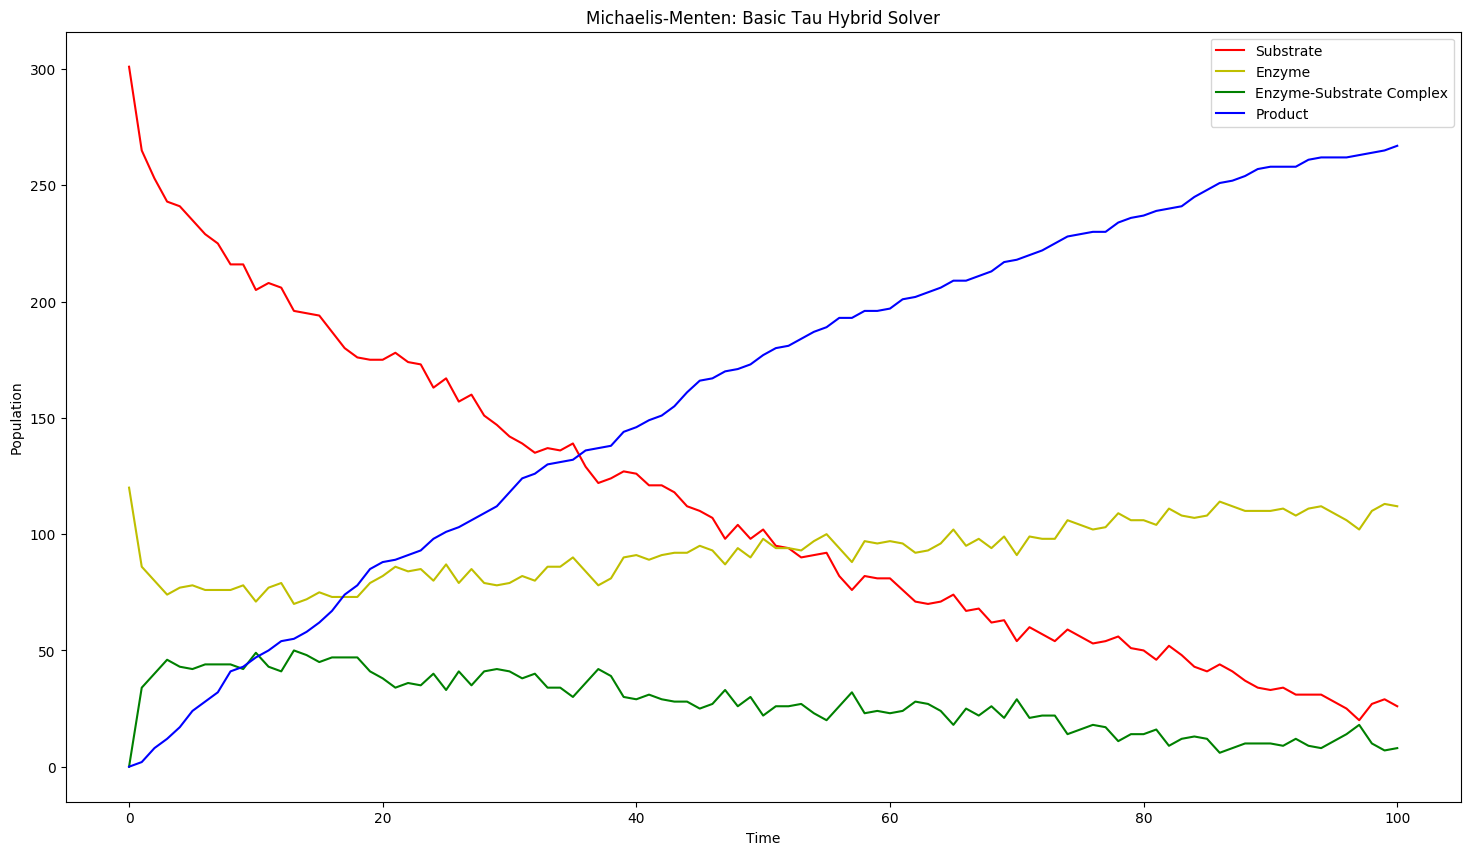

In [114]:
plt.figure(figsize=(18,10))
plt.title("Michaelis-Menten: Basic Tau Hybrid Solver")
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(results['time'],results['Substrate'],'r', label='Substrate')
plt.plot(results['time'],results['Enzyme'],'y', label='Enzyme')
plt.plot(results['time'],results['Enzyme_Substrate_Complex'],'g', label='Enzyme-Substrate Complex')
plt.plot(results['time'],results['Product'],'b', label='Product')

plt.plot([0],[11])
plt.legend(loc='best')